In [13]:
from moonlight import *
import numpy as np
import matplotlib.pyplot as plt

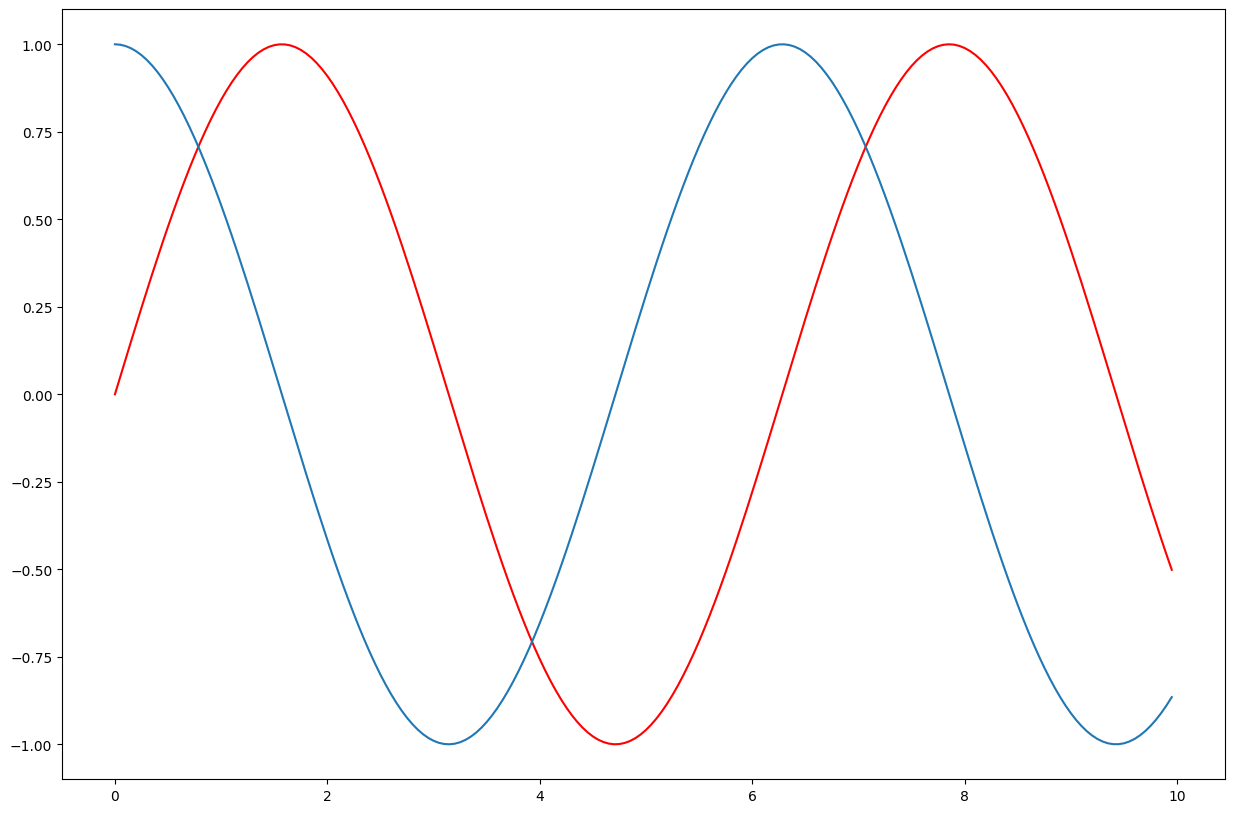

In [24]:
## STEP 1: generate the  signal
time =list(np.arange(0,10,0.05))
f1,f2 = np.sin(time),np.cos(time)

plt.rcParams["figure.figsize"] = (15,10)
plt.plot(time,f1, color='red')
plt.plot(time,f2)

In [15]:
## STEP 2: describe and load the monitor

script = """
signal { real x; real y;}
domain boolean; 
formula future = globally [0, 0.2]  (x > y);
formula past = historically [0, 0.2]  (x > y);
"""

moonlightScript = ScriptLoader.loadFromText(script)

In [16]:
## STEP 3 (optional): change the domain on the fly
#moonlightScript.setMinMaxDomain();
#moonlightScript.setBooleanDomain();

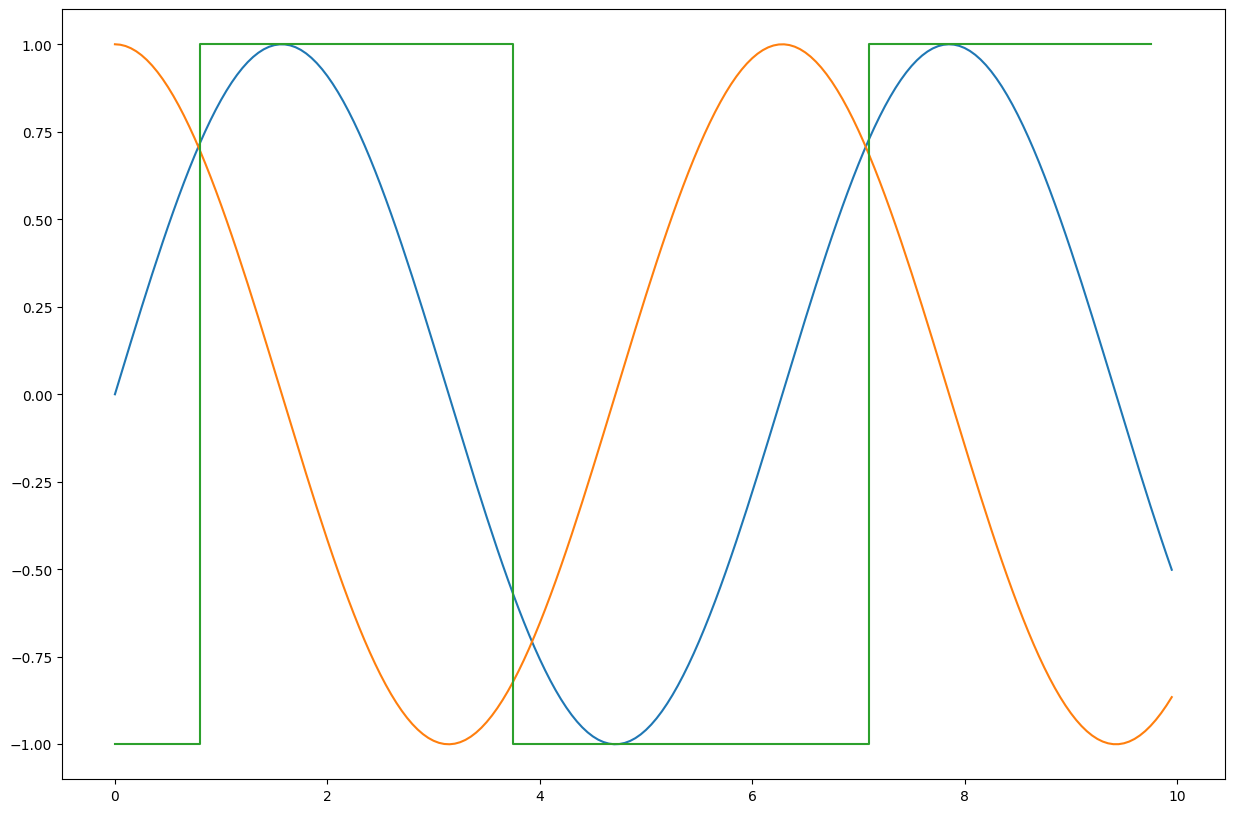

In [ ]:
## STEP 4: getting the monitor associated with a target formula
futureMonitor = moonlightScript.getMonitor("future")

## STEP 5: monitor the signal 
signals = list(zip(f1,f2))
result = futureMonitor.monitor(time,signals)
arrayresults = np.array(futureMonitor.monitor(time,signals))

plt.rcParams["figure.figsize"] = (15,10)
plt.plot(time,f1)
plt.plot(time,f2)
plt.step(arrayresults[:,0],arrayresults[:,1], where='post')

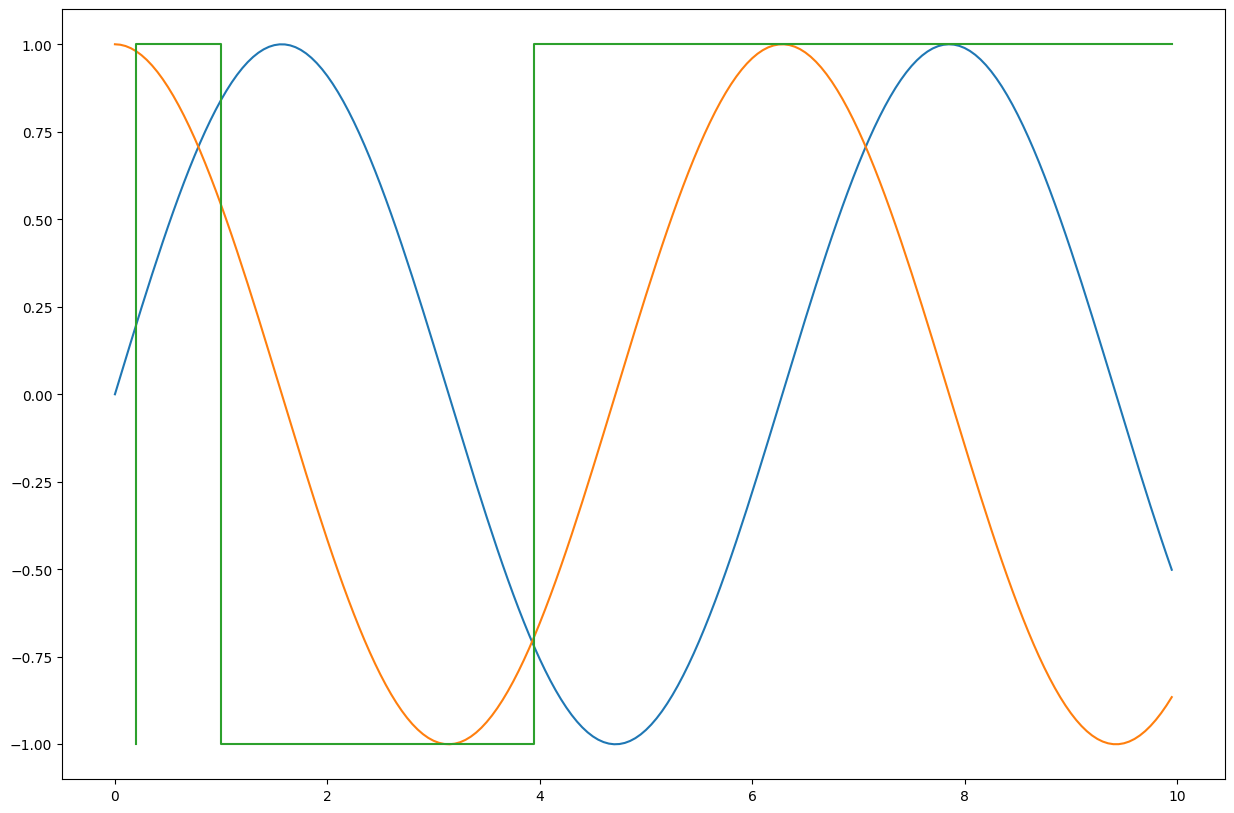

In [18]:
monitor = moonlightScript.getMonitor("past")
time =list(np.arange(0,10,0.05))
f1,f2 = np.sin(time),np.cos(time)
space = list(zip(f1,f2))
result = np.array(monitor.monitor(time,space))
plt.plot(time,f1)
plt.plot(time,f2)
plt.step(result[:,0],result[:,1])

In [19]:
script = """
signal { real x; }
domain boolean; 
formula future = globally [0, 0.2]  (x > 1);
"""
moonlightScript = ScriptLoader.loadFromText(script)

In [20]:
monitor = moonlightScript.getMonitor("future")
time =list(np.arange(0,10,0.05))
f1=np.sin(time)
space = [[x] for x in f1]
result =monitor.monitor(time,space)

In [21]:
print(result)

[[0.0, -1.0], [9.750000000000002, -1.0]]


### Spatio-temporal Example

#### loadFromText

In [22]:
script = """
signal { int nodeType; }
space {edges { int hop; }}
domain boolean;
formula MyFirstFormula = globally{( nodeType==3 ) reach(hop) [0, 1] ( nodeType==1 )};
"""
moonlightScript = ScriptLoader.loadFromText(script)
monitor = moonlightScript.getMonitor("MyFirstFormula")

graph = [[[0.0, 1.0, 1.0], [0.0, 3.0, 1.0], [0.0, 4.0, 1.0], [1.0, 0.0, 1.0], [1.0, 4.0, 1.0], [1.0, 2.0, 1.0], [2.0, 1.0, 1.0], [2.0, 4.0, 1.0], [2.0, 3.0, 1.0], [3.0, 0.0, 1.0], [3.0, 2.0, 1.0], [3.0, 4.0, 1.0], [4.0, 0.0, 1.0], [4.0, 1.0, 1.0], [4.0, 2.0, 1.0], [4.0, 3.0, 1.0]]]
locationTimeArray = [0.0]
signal = [[[1.0]], [[3.0]], [[3.0]], [[3.0]], [[3.0]]]

result = monitor.monitor(locationTimeArray,graph,locationTimeArray,signal)
print(result)

times = new double[]{0.0}
graph = new double[][][]{{{0.0, 1.0, 1.0}, {0.0, 3.0, 1.0}, {0.0, 4.0, 1.0}, {1.0, 0.0, 1.0}, {1.0, 4.0, 1.0}, {1.0, 2.0, 1.0}, {2.0, 1.0, 1.0}, {2.0, 4.0, 1.0}, {2.0, 3.0, 1.0}, {3.0, 0.0, 1.0}, {3.0, 2.0, 1.0}, {3.0, 4.0, 1.0}, {4.0, 0.0, 1.0}, {4.0, 1.0, 1.0}, {4.0, 2.0, 1.0}, {4.0, 3.0, 1.0}}}
signalTimeArray = new double[]{0.0}
signalValues = new double[][][]{{{1.0}}, {{3.0}}, {{3.0}}, {{3.0}}, {{3.0}}}
[[[0.0, 1.0]], [[0.0, 1.0]], [[0.0, -1.0]], [[0.0, 1.0]], [[0.0, 1.0]]]


#### loadFormFile

In [23]:
scriptPath = "script.mls"
moonlightScript = ScriptLoader.loadFromFile(scriptPath)
monitor = moonlightScript.getMonitor("MyFirstFormula")

graph = [[[0.0, 1.0, 1.0], [0.0, 3.0, 1.0], [0.0, 4.0, 1.0], [1.0, 0.0, 1.0], [1.0, 4.0, 1.0], [1.0, 2.0, 1.0], [2.0, 1.0, 1.0], [2.0, 4.0, 1.0], [2.0, 3.0, 1.0], [3.0, 0.0, 1.0], [3.0, 2.0, 1.0], [3.0, 4.0, 1.0], [4.0, 0.0, 1.0], [4.0, 1.0, 1.0], [4.0, 2.0, 1.0], [4.0, 3.0, 1.0]]]
locationTimeArray = [0.0]
signal = [[[1.0]], [[3.0]], [[3.0]], [[3.0]], [[3.0]]]

result = monitor.monitor(locationTimeArray,graph,locationTimeArray,signal)
print(result)

JavaException: JVM exception occurred: script.mls java.nio.file.NoSuchFileException